# R.M.S. TITANIC CASE STUDY

### [1. Read the data](#Read-the-data)

### [2. Explorattory Data Analysis & Data Cleaning](#Explorattory-Data-Analysis-&-Data-Cleaning)
#### [----- 2.1 Data profile report](#Data-profile-report)
#### [----- 2.2 Missing value treatment](#Missing-value-treatment)
#### [----- 2.3 Feature engineering](#Feature-engineering)
#### [----- 2.4 Data preprocessing](#Data-preprocessing)

### [3. Train Test Split](#Train-Test-Split)

### [4. Build Machine Learning models for cross validation](#Build-Machine-Learning-models-for-cross-validation)
#### [----- 4.1 Check cross validation score](#Check-cross-validation-score)
#### [----- 4.2 Feature importance](#Feature-importance)

### [5. Model Performance Metrics(Before tuning)](#Model-Performance-Metrics(Before-tuning))

### [6. Hyperparameter tuning](#Hyperparameter-Tuning)
#### [----- 6.1 Fit the model with best parameters](#Fit-the-model-with-best-parameters)

### [7. Model Performance Metrics(After tuning)](#Model-Performance-Metrics(After-tuning))

### [8. Summary](#Summary)

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

### Read the data

In [2]:
titanic = pd.read_csv('D:/IMS Proschool/Business Analytics/Project/train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Explorattory Data Analysis & Data Cleaning

In [5]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Flynn, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
titanic.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
titanic.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [11]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### Data profile report

In [ ]:
titanic.profile_report()

#### Missing value treatment

In [12]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Find the percentage of missing data per column

total = titanic.isna().sum().sort_values(ascending=False)
perc = titanic.isna().sum()/titanic.isna().count()*100
percent = (round(perc, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])

In [14]:
missing_data.head()

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00


In [15]:
mean_age = titanic.Age.mean()
std_age = titanic.Age.std()
total_null = titanic.Age.isna().sum()

In [16]:
# compute random numbers between the mean and std, with size as total_isna
random_age = np.random.randint(mean_age - std_age, mean_age + std_age, size = total_null)

In [17]:
# fill NA values in Age column with random values generated
age_temp = titanic['Age'].copy()
age_temp[np.isnan(age_temp)] = random_age
titanic['Age'] = age_temp

In [18]:
# convert data type of age to int
titanic['Age'] = titanic['Age'].astype(int)

In [19]:
titanic.Embarked.mode()

0    S
dtype: object

In [20]:
# fill NA values in column Embarked with mode
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace=True)

#### Feature engineering

In [21]:
#drop because not needed
titanic = titanic.drop(['PassengerId','Ticket','Cabin'], axis=1)

In [22]:
#check there are no missing values in the data
titanic.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
# convert data type of Fare to int
titanic['Fare'] = titanic['Fare'].astype(int)

In [24]:
titanic['Survived'] = titanic['Survived'].replace({1:'Yes',0:'No'})

In [25]:
#extract title from column name and assign it to a new categorical column named Title

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Misc": 5}

# extract titles
titanic['Title'] = titanic.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# replace titles with Misc
titanic['Title'] = titanic['Title'].replace(['Dr','Rev','Major','Col','Lady','Jonkheer','Don','Countess','Capt','Sir'], 'Misc')

# Mlle is short for Mademoiselle, a title given to unmarried woman, replace it with Miss
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')

# Ms is short for Miss
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')

# Mme is short for Madame, replace it with Mrs
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

In [26]:
#check values of Title columns

titanic['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Misc       23
Name: Title, dtype: int64

In [27]:
# drop the column Name as we have extracted the titles from it

titanic = titanic.drop(['Name'], axis=1)

In [28]:
# seperate survived and did_not_survive passengers
survived = titanic[titanic['Survived']=='Yes']
did_not_survive = titanic[titanic['Survived']=='No']

In [29]:
num_cols = ['Age','SibSp','Parch','Fare']
cat_cols = ['Pclass','Sex','Embarked','Title']

In [36]:
labels = titanic['Survived'].value_counts().keys().tolist()
values = titanic['Survived'].value_counts().values.tolist()
trace = go.Pie(labels=labels, 
               values=values, 
               marker=dict(colors=['royalblue','lime'], line=dict(color='white', width=1.3)), 
               rotation=90,
               hoverinfo='label+value+text',
               hole=.5
              )
layout = go.Layout(dict(title='Passengers Survival Ratio',
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)"
                        )
                  )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [37]:
#function for pie plot of categorical columns
def plot_pie(column):
    trace1 = go.Pie(values  = survived[column].value_counts().values.tolist(),
                    labels  = survived[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Survived",
                    marker  = dict(line = dict(width = 2, color = "rgb(243,243,243)")),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = did_not_survive[column].value_counts().values.tolist(),
                    labels  = did_not_survive[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2, color = "rgb(243,243,243)")),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Didn't Survive" 
                   )
    layout = go.Layout(dict(title = column + " wise passenger survival ratio",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Passengers that Survived ",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Passengers that didn't Survive",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)
    
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

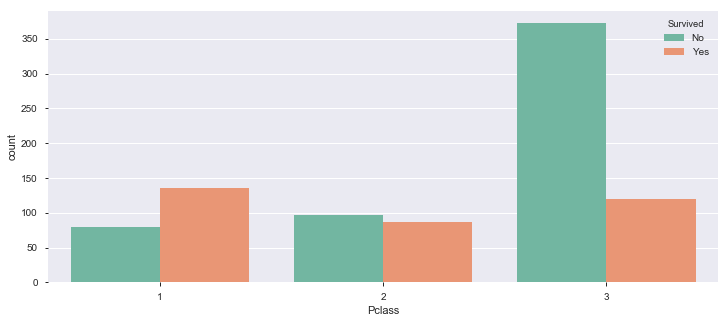

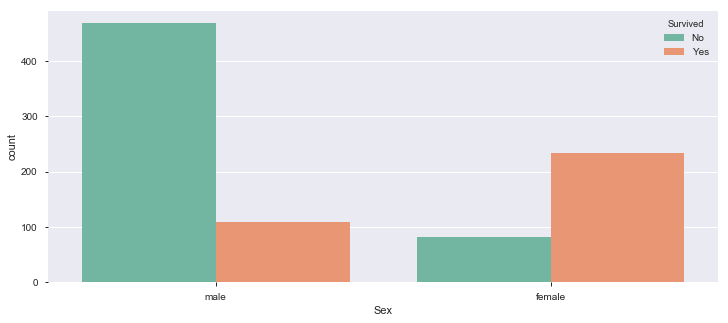

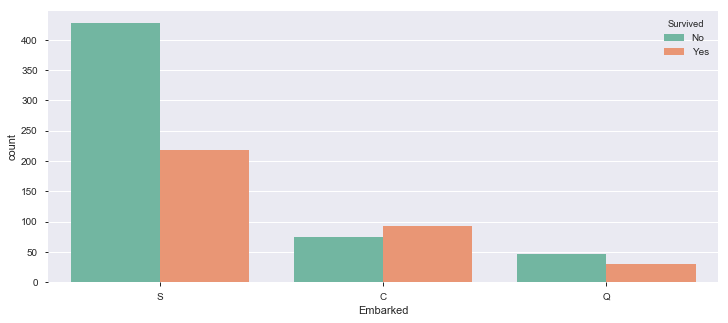

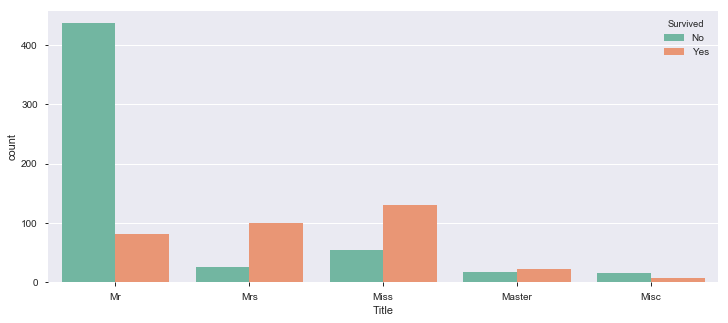

In [52]:
for x in cat_cols:
    plt.figure(figsize=(12,5))
    sns.countplot(x=x, hue='Survived',data = titanic, palette='Set2')
    plt.show()

In [39]:
#function for histogram of numeric columns
def histogram(column):
    trace1 = go.Histogram(x  = survived[column],
                          histnorm= "percent",
                          name = "Passengers that Survived",
                          marker = dict(line = dict(width = .5, color = "black")),
                          opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = did_not_survive[column],
                          histnorm = "percent",
                          name = "Passengers that didn't Survive",
                          marker = dict(line = dict(width = .5, color = "black")),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " wise passenger survival ratio",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                         ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "Percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                         ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    py.iplot(fig)
    
#for all numerical columns plot histogram    
for i in num_cols:
    histogram(i)

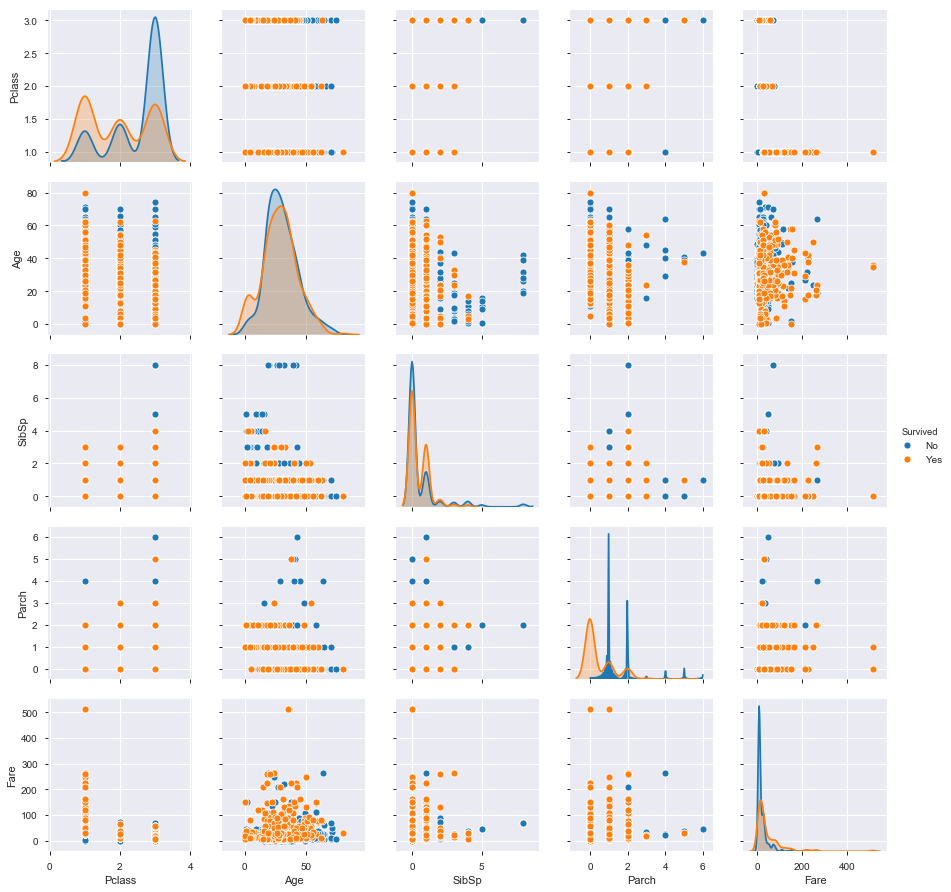

In [41]:
sns.pairplot(titanic, hue='Survived')
plt.show()

In [42]:
#correlation
correlation = titanic.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### Data preprocessing

In [65]:
#check if the data is ready for transformation

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null object
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int32
Embarked    891 non-null object
Title       891 non-null object
dtypes: int32(2), int64(3), object(4)
memory usage: 55.8+ KB


In [66]:
# all numerical columns

titanic_num = titanic[titanic.select_dtypes(include=[np.number]).columns.tolist()]

In [67]:
titanic_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22,1,0,7
1,1,38,1,0,71
2,3,26,0,0,7
3,1,35,1,0,53
4,3,35,0,0,8


In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(titanic_num)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int32, int64 were all converted to float64 by StandardScaler.

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int32, int64 were all converted to float64 by StandardScaler.



In [76]:
len(scaled)

891

In [77]:
scaled2 = pd.DataFrame(scaled,columns=titanic_num.columns)

In [78]:
scaled2.head()

,Pclass,Age,SibSp,Parch,Fare
0,0.827377,-0.574622,0.432793,-0.473674,-0.498948
1,-1.566107,0.610365,0.432793,-0.473674,0.789405
2,0.827377,-0.278375,-0.474545,-0.473674,-0.498948
3,-1.566107,0.388180,0.432793,-0.473674,0.427056
4,0.827377,0.388180,-0.474545,-0.473674,-0.478817


In [68]:
# create dummies for categorical data columns so that all the columns are numerical

titanic_cat = pd.get_dummies(titanic[titanic.select_dtypes(include='object').columns.tolist()])
titanic_cat.head()

,Survived_No,Survived_Yes,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,1,0,0,1,0,0,1,0,0,0,1,0
1,0,1,1,0,1,0,0,0,0,0,0,1
2,0,1,1,0,0,0,1,0,0,1,0,0
3,0,1,1,0,0,0,1,0,0,0,0,1
4,1,0,0,1,0,0,1,0,0,0,1,0


In [79]:
# drop Survived col and assign it to target column
titanic_cat = titanic_cat.drop(['Survived_No','Survived_Yes'], axis=1)
target_col = titanic['Survived']

In [80]:
# merge all the numerical columns

titanic_com = pd.concat([scaled2, titanic_cat], axis=1)
titanic_com.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,0.827377,-0.574622,0.432793,-0.473674,-0.498948,0,1,0,0,1,0,0,0,1,0
1,-1.566107,0.610365,0.432793,-0.473674,0.789405,1,0,1,0,0,0,0,0,0,1
2,0.827377,-0.278375,-0.474545,-0.473674,-0.498948,1,0,0,0,1,0,0,1,0,0
3,-1.566107,0.388180,0.432793,-0.473674,0.427056,1,0,0,0,1,0,0,0,0,1
4,0.827377,0.388180,-0.474545,-0.473674,-0.478817,0,1,0,0,1,0,0,0,1,0


In [81]:
titanic_com.shape

(891, 15)

### Train Test Split

In [82]:
# Assign the predictors and the target variable to X and y respectively

X = titanic_com
y = target_col

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

#### We wil use X_train and y_train for cross validation and check predictions of our selected model on X_test and y_test

### Build Machine Learning models for cross validation

In [84]:
# build ML models for cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [85]:
# create objects of the model classifiers

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=10)
nb = GaussianNB()

#### Check cross validation score

In [86]:
# check cross validation scores (accuracy) for all the models

from sklearn.model_selection import cross_val_score

lr_score = cross_val_score(lr, X_train, y_train, cv=4, scoring='accuracy')
dt_score = cross_val_score(dt, X_train, y_train, cv=4, scoring='accuracy')
rf_score = cross_val_score(rf, X_train, y_train, cv=4, scoring='accuracy')
knn_score = cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy')
nb_score = cross_val_score(nb, X_train, y_train, cv=4, scoring='accuracy')

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [87]:
# print the scores

print('Logistic Regression: ',lr_score)
print('Decision Tree: ',dt_score)
print('Random Forest: ',rf_score)
print('K Nearest Neighbors: ',knn_score)
print('Naive Bayes: ',nb_score)

Logistic Regression:  [0.81005587 0.83146067 0.84269663 0.83050847]
Decision Tree:  [0.75977654 0.76404494 0.76404494 0.82485876]
Random Forest:  [0.7877095  0.75280899 0.86516854 0.84180791]
K Nearest Neighbors:  [0.81005587 0.83707865 0.84269663 0.81355932]
Naive Bayes:  [0.78212291 0.79213483 0.80898876 0.81920904]


In [88]:
#check the mean and standard deviation of the scores to select the best model

#mean
l = lr_score.mean()
d = dt_score.mean()
r = rf_score.mean()
k = knn_score.mean()
n = nb_score.mean()

# stdev
l_s = lr_score.std()
d_s = dt_score.std()
r_s = rf_score.std()
k_s = knn_score.std()
n_s = nb_score.std()

In [89]:
# print the results in a tabular form

res = pd.DataFrame(
        {
        'Model':['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbors','Naive Bayes'],
        'Accuracy':[l,d,r,k,n],
        'Stdev':[l_s, d_s, r_s, k_s, n_s]
        }   )
average_scores = res.sort_values(by='Accuracy', ascending=False)
average_scores

,Model,Accuracy,Stdev
0,Logistic Regression,0.828680,0.011773
3,K Nearest Neighbors,0.825848,0.014234
2,Random Forest,0.811874,0.044184
4,Naive Bayes,0.800614,0.014403
1,Decision Tree,0.778181,0.027006


#### As we can see that Logistic Regression has the best accuracy scores, we will select Logistic Regression Classifier for our problem

In [90]:
lr.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Feature importance

In [91]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc',
       'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')

In [92]:
lr.coef_

array([[-0.9272904 , -0.2916102 , -0.60590238, -0.17677097,  0.11178626,
         0.89737395, -0.71607952,  0.21455206,  0.188806  , -0.22206362,
         1.97201458, -0.90983871, -0.05178289, -1.42182559,  0.59272704]])

In [93]:
lr.coef_[0]

array([-0.9272904 , -0.2916102 , -0.60590238, -0.17677097,  0.11178626,
        0.89737395, -0.71607952,  0.21455206,  0.188806  , -0.22206362,
        1.97201458, -0.90983871, -0.05178289, -1.42182559,  0.59272704])

In [94]:
lr.coef_.ravel()

array([-0.9272904 , -0.2916102 , -0.60590238, -0.17677097,  0.11178626,
        0.89737395, -0.71607952,  0.21455206,  0.188806  , -0.22206362,
        1.97201458, -0.90983871, -0.05178289, -1.42182559,  0.59272704])

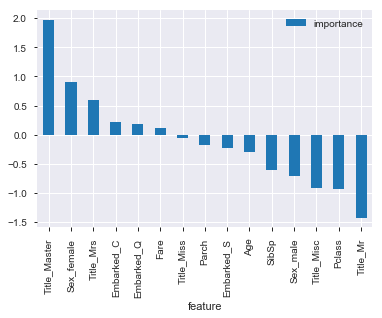

In [95]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':lr.coef_[0]})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

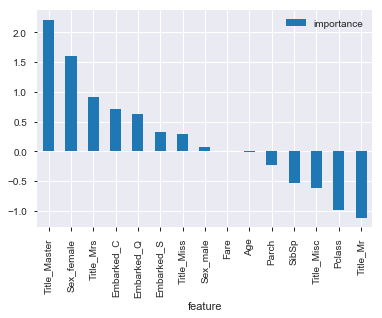

In [96]:
importances

,importance
feature,
Title_Master,1.972015
Sex_female,0.897374
Title_Mrs,0.592727
Embarked_C,0.214552
Embarked_Q,0.188806
Fare,0.111786
Title_Miss,-0.051783
Parch,-0.176771
Embarked_S,-0.222064


In [96]:
importances

,importance
feature,
Title_Master,2.209995
Sex_female,1.602992
Title_Mrs,0.908497
Embarked_C,0.716467
Embarked_Q,0.623771
Embarked_S,0.330702
Title_Miss,0.286019
Sex_male,0.067948
Fare,0.003599


### Model Performance Metrics(Before tuning)

In [97]:
y_pred = lr.predict(X_test)

In [98]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.81      0.88      0.84       106
         Yes       0.80      0.70      0.74        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [106]:
y_test

862    Yes
223     No
84     Yes
680     No
535    Yes
623     No
148     No
3      Yes
34      No
241    Yes
794     No
2      Yes
6       No
17     Yes
368    Yes
430    Yes
819     No
743     No
189     No
437    Yes
382     No
73      No
710    Yes
385     No
111     No
821    Yes
742    Yes
865    Yes
619     No
708    Yes
      ... 
521     No
479    Yes
597     No
16      No
289    Yes
692    Yes
769     No
320     No
845     No
866    Yes
658     No
594     No
355     No
106    Yes
23     Yes
69      No
830    Yes
600    Yes
643    Yes
574     No
659     No
258    Yes
119     No
257    Yes
175     No
796    Yes
815     No
629     No
421     No
448    Yes
Name: Survived, Length: 179, dtype: object

In [105]:
y_pred

array(['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 

In [111]:
roc_score = roc_auc_score(y_test2, y_pred2)
roc_score = np.round(roc_score,2)
roc_score

0.79

0.786

In [107]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test2 = le.fit_transform(y_test)
y_pred2 = le.fit_transform(y_pred)

In [110]:
y_test2

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

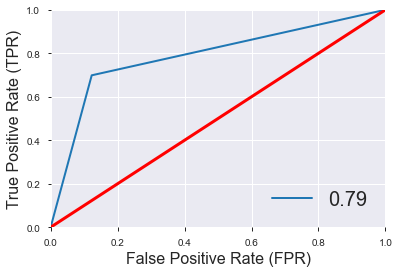

In [112]:
fpr, tpr, thresholds = roc_curve(y_test2, y_pred2)
plt.plot(fpr, tpr, linewidth=2, label=roc_score)
plt.plot([0, 1], [0, 1], 'r', linewidth=3)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate (FPR)', fontsize=16)
plt.ylabel('True Positive Rate (TPR)', fontsize=16)
plt.legend(loc='lower right', prop={'size':20})
plt.show()

### Hyperparameter Tuning

In [113]:
X_train2 = X_train.copy()
y_train2 = y_train.copy()
X_test2 = X_test.copy()
y_test2 = y_test.copy()

In [154]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [114]:
lr_temp = LogisticRegression(solver='liblinear')

In [118]:
param1 = {  'penalty' : ['l1', 'l2'],
            'C' : np.logspace(-4, 4, 20)}

param2 = {  'penalty' : ['l1', 'l2'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

param3 = {  'penalty' : ['l1', 'l2'],
            'C': np.arange(0.1, 10, 0.05) }

param4 = {  'penalty' : ['l1', 'l2'],
            'C': np.arange(0.01, 1, 0.005) }

In [117]:
len(np.arange(0.01, 1, 0.005))

198

In [119]:
from sklearn.model_selection import GridSearchCV
clf1 = GridSearchCV(lr_temp, param1, cv=5, verbose=True)

In [120]:
clf2 = GridSearchCV(lr_temp, param2, cv=5, verbose=True)
clf3 = GridSearchCV(lr_temp, param3, cv=5, verbose=True)
clf4 = GridSearchCV(lr_temp, param4, cv=5, verbose=True)

In [121]:
best_clf1 = clf1.fit(X_train2, y_train2)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    2.8s finished


In [122]:
# View best hyperparameters
print('Best Penalty:', best_clf1.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf1.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.615848211066026


In [123]:
clf1.best_params_

{'C': 0.615848211066026, 'penalty': 'l1'}

In [124]:
best_clf2 = clf2.fit(X_train2, y_train2)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.9s finished


In [126]:
clf2.best_params_

{'C': 1, 'penalty': 'l1'}

In [125]:
best_clf3 = clf3.fit(X_train2, y_train2)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1980 out of 1980 | elapsed:   21.2s finished


In [127]:
clf3.best_params_

{'C': 0.3500000000000001, 'penalty': 'l1'}

In [128]:
best_clf4 = clf4.fit(X_train2, y_train2)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1980 out of 1980 | elapsed:   17.3s finished


In [129]:
clf4.best_params_

{'C': 0.31499999999999995, 'penalty': 'l1'}

In [134]:
y_test_2 = le.fit_transform(y_test2)
y_pred_clf1_2 = le.fit_transform(y_pred_clf1)

In [135]:
roc_clf1 = roc_auc_score(y_test_2, y_pred_clf1_2)
print('ROC: ',roc_clf1)

ROC:  0.7811449987076765


In [130]:
y_pred_clf1 = clf1.predict(X_test2)
print(classification_report(y_test2, y_pred_clf1))
#roc_clf1 = roc_auc_score(y_test2, y_pred_clf1)
#print('ROC: ',roc_clf1)

              precision    recall  f1-score   support

          No       0.80      0.88      0.84       106
         Yes       0.79      0.68      0.74        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [131]:
y_pred_clf2 = best_clf2.predict(X_test2)
print(classification_report(y_test2, y_pred_clf2))

              precision    recall  f1-score   support

          No       0.80      0.88      0.84       106
         Yes       0.79      0.68      0.74        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [132]:
y_pred_clf3 = best_clf3.predict(X_test2)
print(classification_report(y_test2, y_pred_clf3))

              precision    recall  f1-score   support

          No       0.81      0.88      0.84       106
         Yes       0.80      0.70      0.74        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [133]:
y_pred_clf4 = best_clf4.predict(X_test2)
print(classification_report(y_test2, y_pred_clf4))

              precision    recall  f1-score   support

          No       0.81      0.88      0.84       106
         Yes       0.80      0.70      0.74        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Summary